# Notebook to Look at SMELT results 


In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import datetime
import os
import numpy as np

from salishsea_tools import visualisations as vis
from salishsea_tools import (teos_tools, tidetools)

%matplotlib inline

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [4]:
mesh_mask = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
tmask = mesh_mask.variables['tmask'][:]

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

#final = '/results/SalishSea/nowcast-green/04jun16/'
final = '/ocean/sallen/allen/research/MEOPAR/myResults/nowcast-green/31mar16/'
date = datetime.datetime(2016, 3, 31)
ptrc_T = results_dataset(final, date, 1, '1d', 'ptrc_T')
nitrateF = ptrc_T.variables['NO3'][0,:,:,:]
print (nitrateF.shape)

#initial = '/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/initial_green/BioIC_SMELT_v1.nc'
initial = '/results/SalishSea/nowcast-green/31mar16/'
ni = results_dataset(initial, date, 1, '1d', 'ptrc_T')
#print (ni.variables.keys())
#nitrate0 = ni.variables['TRNNO3'][0,:]
nitrate0 = ni.variables['NO3'][0,:,:,:]

/ocean/sallen/allen/research/MEOPAR/myResults/nowcast-green/31mar16/SalishSea_1d_20160331_20160331_ptrc_T.nc
(40, 898, 398)
/results/SalishSea/nowcast-green/31mar16/SalishSea_1d_20160331_20160331_ptrc_T.nc


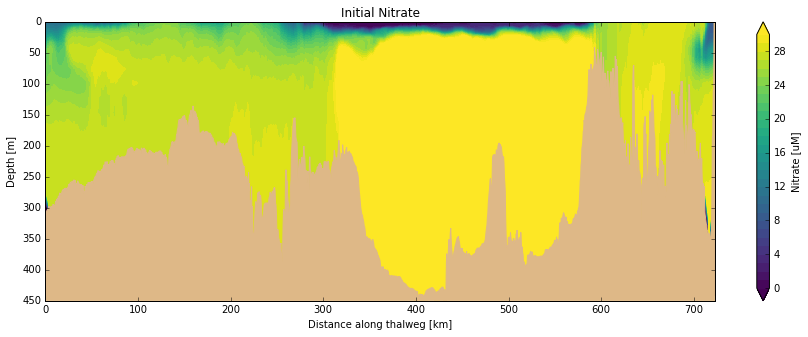

In [5]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
clevels = np.arange(0., 31., 1)
cbar = vis.contour_thalweg(ax, nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Initial Nitrate')

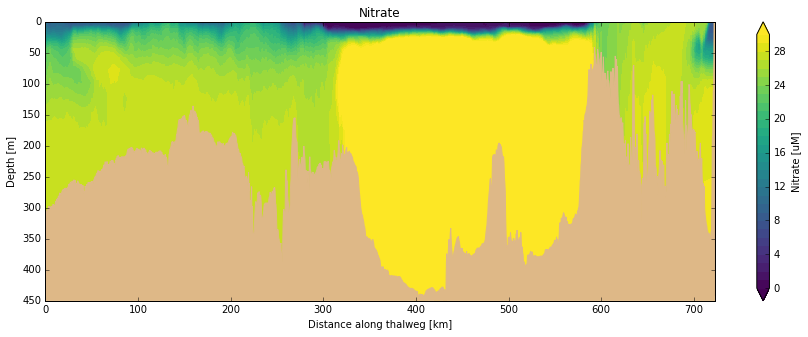

In [7]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, nitrateF, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Nitrate [uM]')
ax.set_title('Nitrate')

In [ ]:
phyto0 = ni.variables['TRNPHY'][0,:] + ni.variables['TRNPHY2'][0,:]
clevels = np.arange(0, 12, 1.)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, phyto0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([50,0])
cbar.set_label('Log Initial Phyto [uM]')
ax.set_title('Initial Diatoms + Flag');

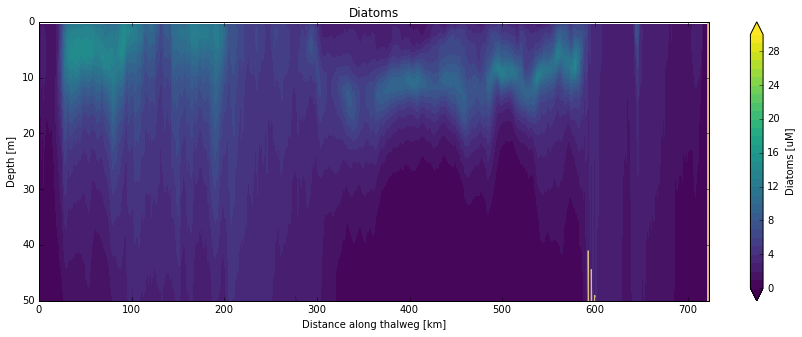

In [9]:
diatoms = ptrc_T.variables['PHY2'][0,:,:,:] 
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, diatoms, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([50,0])
cbar.set_label('Diatoms [uM]')
ax.set_title('Diatoms');

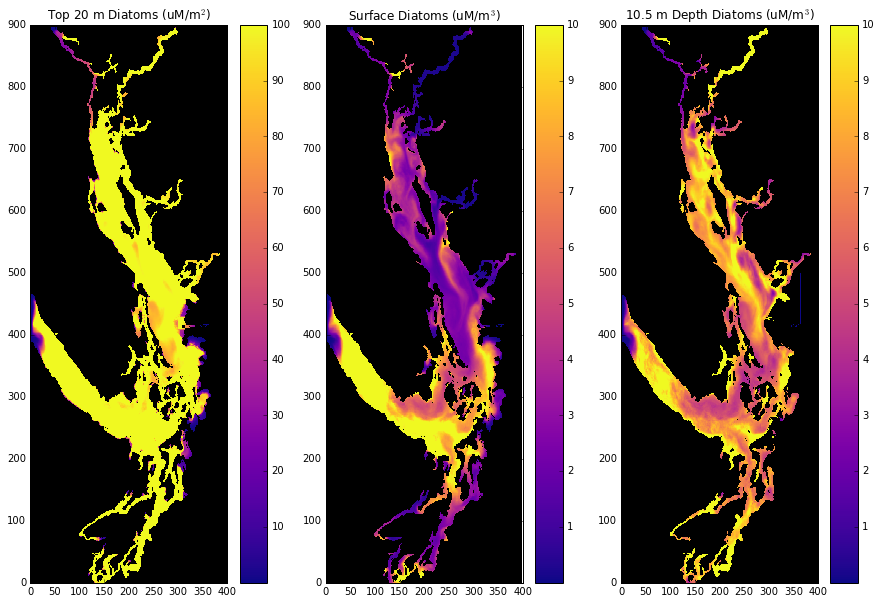

In [10]:
diatoms_masked = np.ma.array(diatoms[0:20], mask=np.logical_not(tmask[0, 0:20]))
sum_diatoms = np.sum(diatoms_masked, axis=0)
fig, ax = plt.subplots(1, 3, figsize=(15,10))
cmap = plt.get_cmap('plasma')
cmap.set_bad('black')
mesh = ax[0].pcolormesh(sum_diatoms, cmap=cmap, vmax = 100)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_title('Top 20 m Diatoms (uM/m$^2$)')
mesh = ax[1].pcolormesh(diatoms_masked[0], cmap=cmap, vmax = 10)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_title('Surface Diatoms (uM/m$^3$)')
mesh = ax[2].pcolormesh(diatoms_masked[11], cmap=cmap, vmax= 10)
ax[2].set_title('10.5 m Depth Diatoms (uM/m$^3$)')
fig.colorbar(mesh, ax=ax[2])

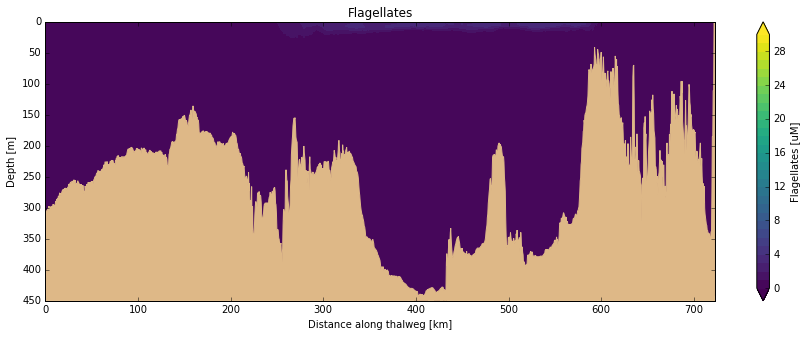

In [11]:
flag = ptrc_T.variables['PHY'][0,:,:,:]
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, flag, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0])
cbar.set_label('Flagellates [uM]')
ax.set_title('Flagellates');

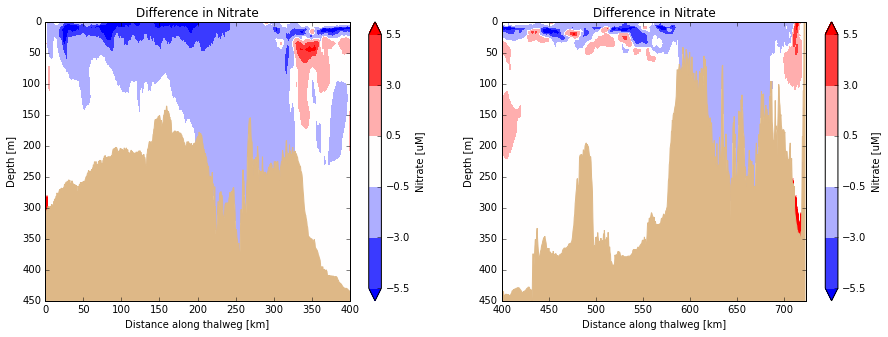

In [14]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
clevels = [-5.5, -3, -0.5, 0.5, 3, 5.5]

cbar = vis.contour_thalweg(ax[0], nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[0].set_ylim([450,0])
ax[0].set_xlim([0,400])
cbar.set_label('Nitrate [uM]')
ax[0].set_title('Difference in Nitrate')

cbar = vis.contour_thalweg(ax[1], nitrateF-nitrate0, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='bwr')
ax[1].set_ylim([450,0])
ax[1].set_xlim([400, 724])
cbar.set_label('Nitrate [uM]')
ax[1].set_title('Difference in Nitrate')

In [ ]:
print (ptrc_T.variables.keys())
#nitrateF = ptrc_T.variables['NO3'][:,:,:,:]


In [15]:
for v in ptrc_T.variables.keys():
    print (v, np.max(ptrc_T.variables[v][:]))

DOC 18.3465
MICZ 4.41618
MYRI 1.0523
NH4 6.76203
NO3 38.954
O2 532380.0
PHY 4.96025
PHY2 28.4401
POC 2.45746
Si 76.9427
area 239355.0
bSi 12.5027
bounds_lat 51.1048
bounds_lon -121.318
deptht 441.466
deptht_bounds 454.932
nav_lat 51.1048
nav_lon -121.318
time_centered 3668414400.0
time_centered_bounds 3668457600.0
time_counter 3668414400.0
time_counter_bounds 3668457600.0


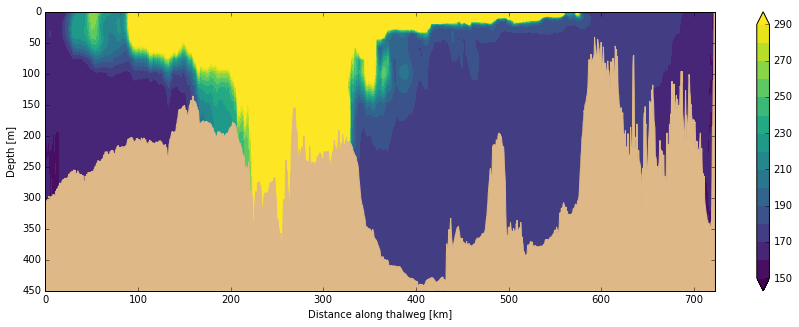

In [17]:
oxy = ptrc_T.variables['O2'][0, :]
clevels = np.arange(150, 300, 10)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, oxy, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0]);


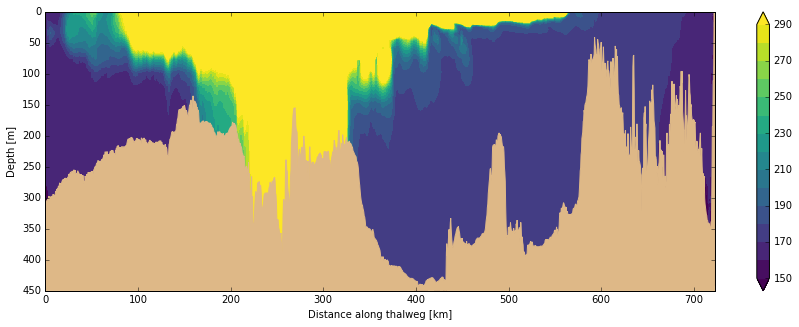

In [19]:
oxy_in = ni.variables['O2'][0, :]
clevels = np.arange(150, 300, 10)
fig,ax = plt.subplots(1,1,figsize=(15,5))
cbar = vis.contour_thalweg(ax, oxy_in, bathy, lons, lats, mesh_mask, 'gdept_0', clevels, cmap='viridis')
ax.set_ylim([450,0]);

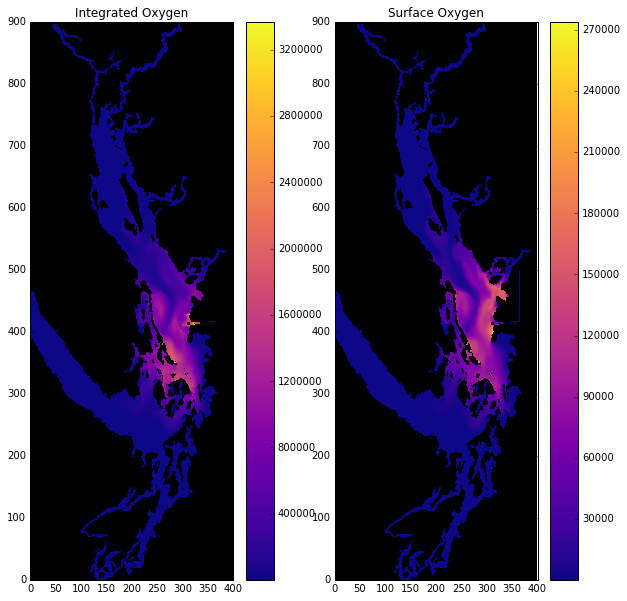

In [20]:
oxy_masked = np.ma.array(oxy, mask=np.logical_not(tmask[0]))
sum_oxy = np.sum(oxy_masked, axis=0)
fig, ax = plt.subplots(1, 2, figsize=(10,10))
cmap = plt.get_cmap('plasma')
cmap.set_bad('black')
mesh = ax[0].pcolormesh(sum_oxy, cmap=cmap)
fig.colorbar(mesh, ax=ax[0])
ax[0].set_title('Integrated Oxygen')
mesh = ax[1].pcolormesh(oxy_masked[0], cmap=cmap)
fig.colorbar(mesh, ax=ax[1])
ax[1].set_title('Surface Oxygen')